## Library Loading

In [1]:
'''
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd
from sklearn.metrics import accuracy_score

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 7776
다음 그림은 숫자 8 입니다.


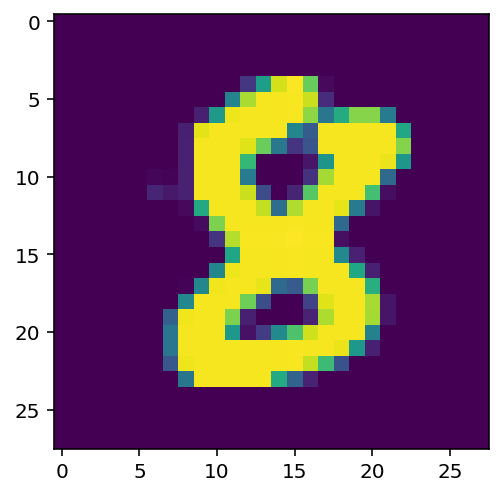

In [11]:
# image
id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {y_test[id]} 입니다.')
plt.imshow(x_test[id])
plt.show()

In [12]:
# convolutional layer 사용을 위한 reshape

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
_, h, w = x_train.shape

print(h, w)

28 28


In [14]:
x_train = x_train.reshape(x_train.shape[0], h, w, 1)
x_test = x_test.reshape(x_test.shape[0], h, w, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [15]:
# Scaling (Local Minimum 방지)

print(f'max : {x_train.max()}, min : {x_train.min()}')

max : 255, min : 0


In [16]:
max_num = x_train.max()

x_train = x_train / max_num
x_test = x_test / max_num

print(f'max : {x_train.max()} , min : {x_train.min()}')

max : 1.0 , min : 0.0


## Sequential API

In [17]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPool2D

In [18]:
# 1. Session Clear
clear_session()

# 2. Model
model = Sequential()

# 3. Layer
model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. Compile
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [20]:
# 5. fit
history = model.fit(x_train, y_train, epochs=15, batch_size=1024,
                    validation_split=0.2, verbose=1)

Epoch 1/15
47/47 [==============================] - 17s 91ms/step - loss: 0.3819 - accuracy: 0.8817 - val_loss: 2.1749 - val_accuracy: 0.2059
Epoch 2/15
47/47 [==============================] - 3s 57ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 2.9132 - val_accuracy: 0.1209
Epoch 3/15
47/47 [==============================] - 3s 57ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 4.5801 - val_accuracy: 0.1060
Epoch 4/15
47/47 [==============================] - 3s 58ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 4.2068 - val_accuracy: 0.1060
Epoch 5/15
47/47 [==============================] - 3s 60ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 5.6989 - val_accuracy: 0.1060
Epoch 6/15
47/47 [==============================] - 3s 58ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 4.6349 - val_accuracy: 0.1140
Epoch 7/15
47/47 [==============================] - 3s 59ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 3.8340 - val_accuracy: 0.1569
Epoch 8/15
4

In [21]:
performance_test = model.evaluate(x_test, y_test, batch_size=100)

print(f'Test Loss : {performance_test[0]:.6f},  Test Accuracy : {performance_test[1]*100:.3f}%')

100/100 [==============================] - 1s 3ms/step - loss: 0.0259 - accuracy: 0.9926
Test Loss : 0.025918,  Test Accuracy : 99.260%


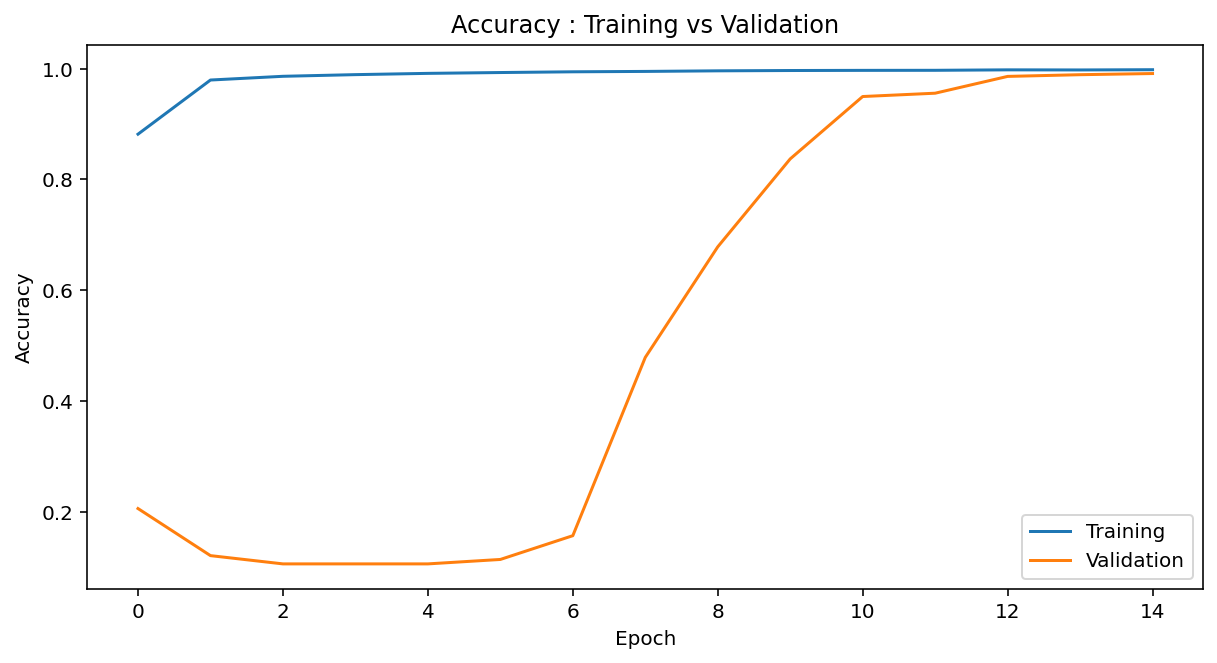

In [22]:
if not isinstance(history, dict) :
    history = history.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

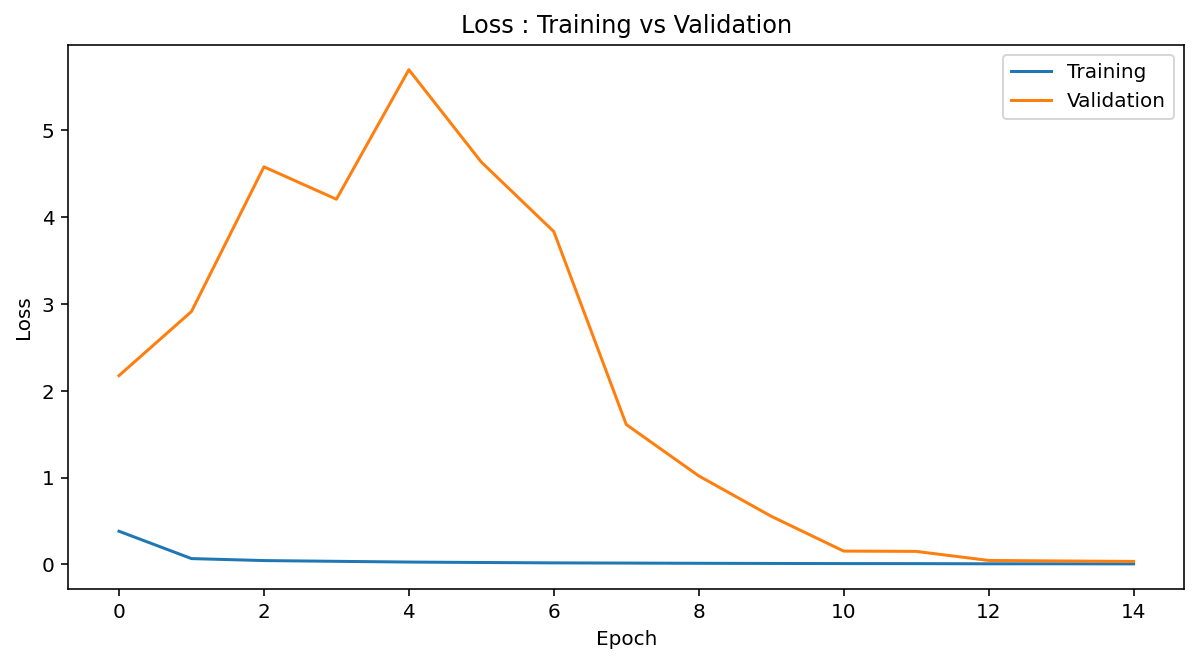

In [23]:
if not isinstance(history, dict) :
    history = history.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
# 예측값 생성
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(y_train, single_pred_train)
logi_test_accuracy = accuracy_score(y_test, single_pred_test)

print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

CNN
트레이닝 정확도 : 99.77%
테스트 정확도 : 99.26%


## 숫자 이미지 시각화

id = 8824
다음 그림은 숫자 6 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0. 100.   0.   0.   0.]
정답입니다


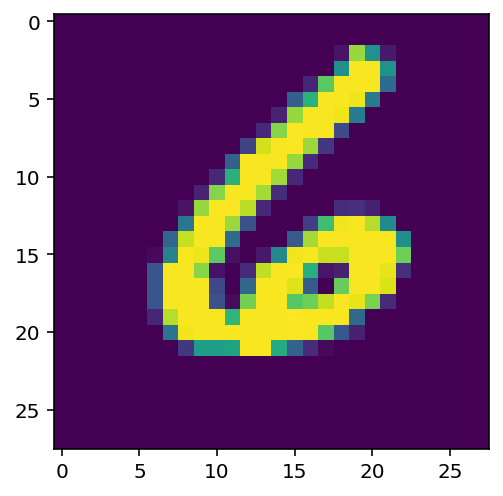

In [25]:
# 성능 확인

id = rd.randrange(0,10000)
print(f'id = {id}')
print(f'다음 그림은 숫자 {y_test[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if y_test[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(x_test[id].reshape([28,-1]))
plt.show()

id = 1828
다음 그림은 숫자 3 입니다.
모델의 예측 : 7
모델의 카테고리별 확률 : [ 0.  0.  0. 29.  0.  0.  0. 69.  0.  0.]
틀렸어요


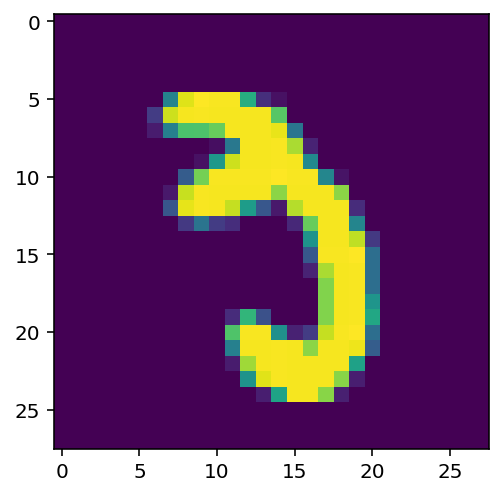

In [27]:
# 틀린 것 관찰

true_false = (y_test==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {y_test[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if y_test[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(x_test[id].reshape([28,-1]))
plt.show()